In [33]:
import numpy as np
from main import nmf_son, nmf_son_acc
import matplotlib.pyplot as plt

np.random.seed(42)
np.set_printoptions(precision=3)

In [34]:
def load_results(filepath):
    data = np.load(filepath)
    return data['Wb'], data['Hb'], data['Wl'], data['Hl'], data['fscores'], data['gscores'], data['lambda_vals']

def save_results(filepath, Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals):
    with open(filepath, 'wb') as fout:
        np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

In [35]:
X = np.load('urban/2022_11_17/small/X.npz')['X']

In [36]:
acc_filepath = 'urban/2022_11_27/acc_testing/r{}_it{}_l{}_{}.npz'

## Rank = 6

In [37]:
# data = np.load('urban/2022_11_17/small/r6_ini.npz')
rank = 6
ini_W = np.random.rand(X.shape[0], rank)
ini_H = np.random.rand(rank, X.shape[1])

In [38]:
reg = 2
iters = 200
aa_size = 2

In [39]:
%%time
Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters)

CPU times: total: 1h 34min 53s
Wall time: 5min 29s


In [40]:
save_results(acc_filepath.format(rank, iters, reg, 'base'), Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base)

In [41]:
%%time
Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=aa_size)

CPU times: total: 2h 10min 59s
Wall time: 9min 5s


In [42]:
save_results(acc_filepath.format(rank, iters, reg, 'z2'), Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2)

In [43]:
%%time
Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=aa_size)

CPU times: total: 1d 2h 50min 25s
Wall time: 4h 38min 48s


In [44]:
save_results(acc_filepath.format(rank, iters, reg, 'all2'), Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2)

In [45]:
%%time
Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc = nmf_son_acc(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters)

CPU times: total: 7h 30min 49s
Wall time: 1h 10min 3s


In [46]:
save_results(acc_filepath.format(rank, iters, reg, 'acc'), Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc)

In [47]:
total_scores_base = fscores_base + lambda_vals_base * gscores_base
total_scores_z2 = fscores_z2 + lambda_vals_z2 * gscores_z2
total_scores_all2 = fscores_all2+ lambda_vals_all2 * gscores_all2
total_scores_acc = fscores_acc + lambda_vals_acc * gscores_acc

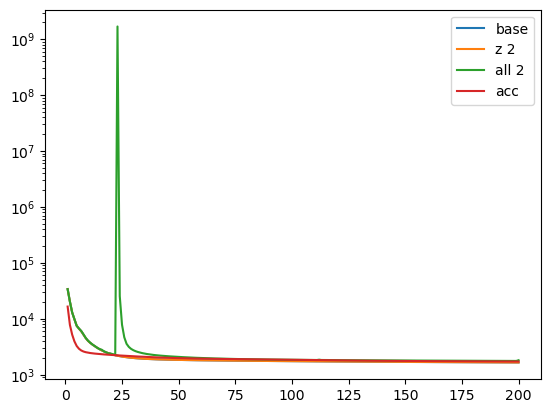

In [48]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_all2)
plt.plot(total_scores_acc)
plt.legend(['base', 'z 2', 'all 2', 'acc'])

In [49]:
Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=3)
save_results(acc_filepath.format(rank, iters, reg, 'z3'), Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3)

Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=4)
save_results(acc_filepath.format(rank, iters, reg, 'z4'), Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4)


In [50]:
total_scores_z3 = fscores_z3 + lambda_vals_z3 * gscores_z3
total_scores_z4 = fscores_z4 + lambda_vals_z4 * gscores_z4

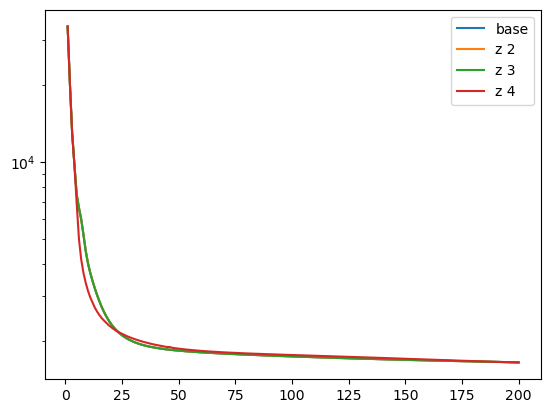

In [51]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_z3)
plt.plot(total_scores_z4)
plt.legend(['base', 'z 2', 'z 3', 'z 4'])

In [52]:
Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=3)
save_results(acc_filepath.format(rank, iters, reg, 'all3'), Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3)

Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=4)
save_results(acc_filepath.format(rank, iters, reg, 'all4'), Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4)


In [53]:
total_scores_all3 = fscores_all3 + lambda_vals_all3 * gscores_all3
total_scores_all4 = fscores_all4 + lambda_vals_all4 * gscores_all4

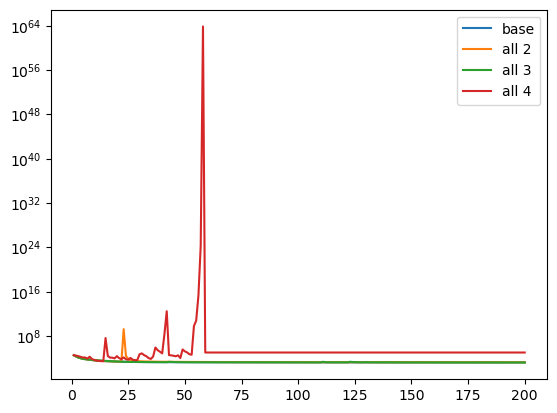

In [54]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_all2)
plt.plot(total_scores_all3)
plt.plot(total_scores_all4)
plt.legend(['base', 'all 2', 'all 3', 'all 4'])

In [55]:
# plt.yscale('log')
# plt.plot(fscores_base)
# plt.plot(gscores_base)
# plt.plot(total_scores_base)
#
# plt.plot(fscores_acc)
# plt.plot(gscores_acc)
# plt.plot(total_scores_acc)
#
# plt.legend(['base f', 'base g', 'base total', 'acc f', 'acc g', 'acc total'])

## Rank = 3

In [56]:
# data = np.load('urban/2022_11_17/small/r6_ini.npz')
rank = 3
ini_W = np.random.rand(X.shape[0], rank)
ini_H = np.random.rand(rank, X.shape[1])

In [57]:
reg = 2
iters = 200
aa_size = 2

In [58]:
%%time
Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters)

CPU times: total: 23min 54s
Wall time: 1min 59s


In [59]:
save_results(acc_filepath.format(rank, iters, reg, 'base'), Wb_base, Hb_base, Wl_base, Hl_base, fscores_base, gscores_base, lambda_vals_base)

In [60]:
%%time
Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=aa_size)

CPU times: total: 3min 18s
Wall time: 12.6 s


In [61]:
save_results(acc_filepath.format(rank, iters, reg, 'z2'), Wb_z2, Hb_z2, Wl_z2, Hl_z2, fscores_z2, gscores_z2, lambda_vals_z2)

In [62]:
%%time
Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=aa_size)

CPU times: total: 1h 45min 28s
Wall time: 10min 8s


In [63]:
save_results(acc_filepath.format(rank, iters, reg, 'all2'), Wb_all2, Hb_all2, Wl_all2, Hl_all2, fscores_all2, gscores_all2, lambda_vals_all2)

In [64]:
%%time
Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc = nmf_son_acc(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters)

CPU times: total: 15min 38s
Wall time: 1min 9s


In [65]:
save_results(acc_filepath.format(rank, iters, reg, 'acc'), Wb_acc, Hb_acc, Wl_acc, Hl_acc, fscores_acc, gscores_acc, lambda_vals_acc)

In [66]:
total_scores_base = fscores_base + lambda_vals_base * gscores_base
total_scores_z2 = fscores_z2 + lambda_vals_z2 * gscores_z2
total_scores_all2 = fscores_all2+ lambda_vals_all2 * gscores_all2
total_scores_acc = fscores_acc + lambda_vals_acc * gscores_acc

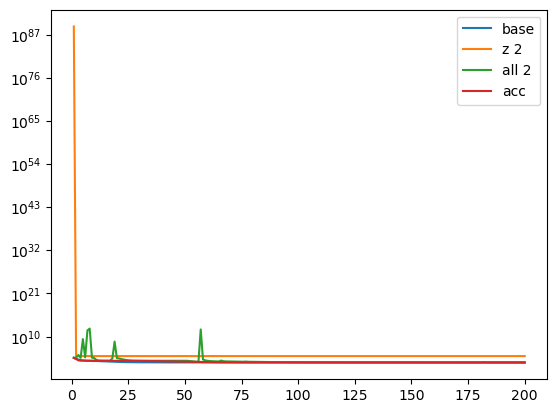

In [67]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_all2)
plt.plot(total_scores_acc)
plt.legend(['base', 'z 2', 'all 2', 'acc'])

In [68]:
Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=3)
save_results(acc_filepath.format(rank, iters, reg, 'z3'), Wb_z3, Hb_z3, Wl_z3, Hl_z3, fscores_z3, gscores_z3, lambda_vals_z3)

Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='z', andersen_win=4)
save_results(acc_filepath.format(rank, iters, reg, 'z4'), Wb_z4, Hb_z4, Wl_z4, Hl_z4, fscores_z4, gscores_z4, lambda_vals_z4)


In [69]:
total_scores_z3 = fscores_z3 + lambda_vals_z3 * gscores_z3
total_scores_z4 = fscores_z4 + lambda_vals_z4 * gscores_z4

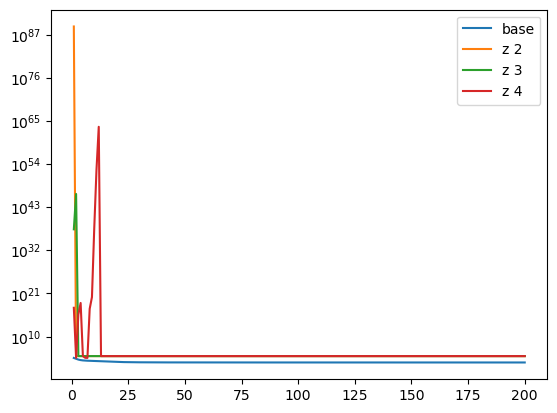

In [70]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_z2)
plt.plot(total_scores_z3)
plt.plot(total_scores_z4)
plt.legend(['base', 'z 2', 'z 3', 'z 4'])

In [71]:
Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=3)
save_results(acc_filepath.format(rank, iters, reg, 'all3'), Wb_all3, Hb_all3, Wl_all3, Hl_all3, fscores_all3, gscores_all3, lambda_vals_all3)

Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=iters, andersen_type='all', andersen_win=4)
save_results(acc_filepath.format(rank, iters, reg, 'all4'), Wb_all4, Hb_all4, Wl_all4, Hl_all4, fscores_all4, gscores_all4, lambda_vals_all4)


In [72]:
total_scores_all3 = fscores_all3 + lambda_vals_all3 * gscores_all3
total_scores_all4 = fscores_all4 + lambda_vals_all4 * gscores_all4

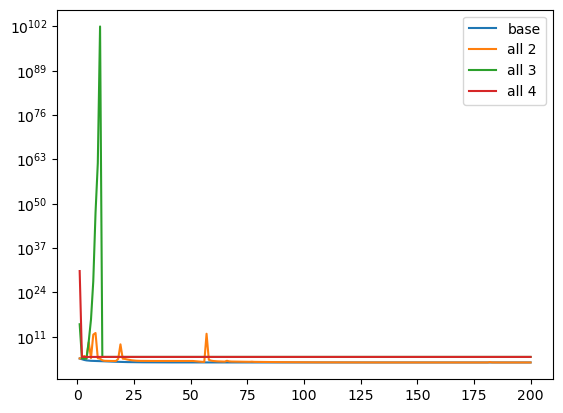

In [73]:
plt.yscale('log')
plt.plot(total_scores_base)
plt.plot(total_scores_all2)
plt.plot(total_scores_all3)
plt.plot(total_scores_all4)
plt.legend(['base', 'all 2', 'all 3', 'all 4'])

In [74]:
# plt.yscale('log')
# plt.plot(fscores_base)
# plt.plot(gscores_base)
# plt.plot(total_scores_base)
#
# plt.plot(fscores_acc)
# plt.plot(gscores_acc)
# plt.plot(total_scores_acc)
#
# plt.legend(['base f', 'base g', 'base total', 'acc f', 'acc g', 'acc total'])